In [171]:
import soccerdata as sd
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import numpy as np
import pyarrow
import seaborn as sb
import csv
import os
from mplsoccer import VerticalPitch, Pitch
import math

In [172]:
DIR = 'utd_games'
num = sum(os.path.isfile(os.path.join(DIR, name)) for name in os.listdir(DIR))
num

17

In [173]:
os.listdir(DIR)[0]

'1903125.csv'

In [174]:
games = []
for i in range(num):
    games.append(os.listdir(DIR)[i])

In [175]:
game = pd.read_csv(DIR+'/'+games[0])
game


,league,season,game,game_id,period,minute,second,expanded_minute,type,outcome_type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,FirstHalf,0,0.0,0,Start,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,FirstHalf,0,0.0,0,Start,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,FirstHalf,0,0.0,0,Pass,Successful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Length', 'value': 2...",True,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,FirstHalf,0,3.0,0,Pass,Unsuccessful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Angle', 'value': 21...",True,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,FirstHalf,0,7.0,0,Aerial,Successful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Zone', 'value': 56}...",False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,SecondHalf,96,5.0,98,End,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1443,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,PostGame,0,0.0,8,End,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1444,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,PostGame,0,0.0,8,End,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1445,ENG-Premier League,2526,2025-08-17 Manchester United-Arsenal,1903125,PreMatch,0,0.0,0,FormationSet,Successful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'CaptainPlayerId', '...",False,NaN,NaN,NaN,NaN,NaN


In [178]:
def shotmap_gen(match):
    DIR = 'utd_games'
    game = pd.read_csv(DIR+'/'+match)

    shots_df = game[['minute','second','team','x', 'y' ,'is_shot', 'is_goal', 'blocked_x', 'blocked_y','goal_mouth_y','goal_mouth_z']]
    shots_df = shots_df[shots_df['is_shot'] == True]
    shots_df

    teams = shots_df['team'].sort_values().to_list()
    opposition = ''
    if teams[0] == 'Man Utd':
        opposition = teams[-1]
    else:
        opposition = teams[0]

    man_utd_shots_df = shots_df[shots_df['team'] == 'Man Utd']

    opposition_shots_df = shots_df[shots_df['team'] == opposition]

    man_utd_shots_df

    mutd_g_df = man_utd_shots_df[man_utd_shots_df['is_goal'] == True]
    mutd_ng_df = man_utd_shots_df[man_utd_shots_df['is_goal'] != True]

    opposition_g_df = opposition_shots_df[opposition_shots_df['is_goal'] == True]
    opposition_ng_df = opposition_shots_df[opposition_shots_df['is_goal'] != True]

    pitch = Pitch(half=False, goal_type='box', goal_alpha=0.8)
    fig, ax = pitch.draw(figsize=(10, 8))
    #whoscored coordinates are 0 ~ 100. defauly pitch on Pitch is 0 ~ 120, so conversion by *1.2 and *0.8 is required
    United_sc_g = pitch.scatter(mutd_g_df['x']*1.2, mutd_g_df['y']*0.8, marker="o",c= 'red', ax=ax, linewidth = 3)
    United_sc_g = pitch.scatter(mutd_ng_df['x']*1.2, mutd_ng_df['y']*0.8, marker="o",c= 'white', ax=ax, linewidth = 3)
    Opposition_sc_g = pitch.scatter(120 - opposition_g_df['x']*1.2, 80 - opposition_g_df['y']*0.8, marker="o",c= 'blue', ax=ax, linewidth = 5)
    Opposition_sc_g = pitch.scatter(120 - opposition_ng_df['x']*1.2, 80 - opposition_ng_df['y']*0.8, marker="o",c= 'green', ax=ax, linewidth = 5)

    fig.text(s=f"Manchester United vs {opposition} Shots Map", x= 0.06, y= 0.96, fontsize=22,fontweight="bold")
    ax.legend(title = 'Outcome', labelspacing=1, loc="upper center",ncol=6,frameon=True,fancybox=True, shadow=True,bbox_to_anchor=(0.5, -0.01))

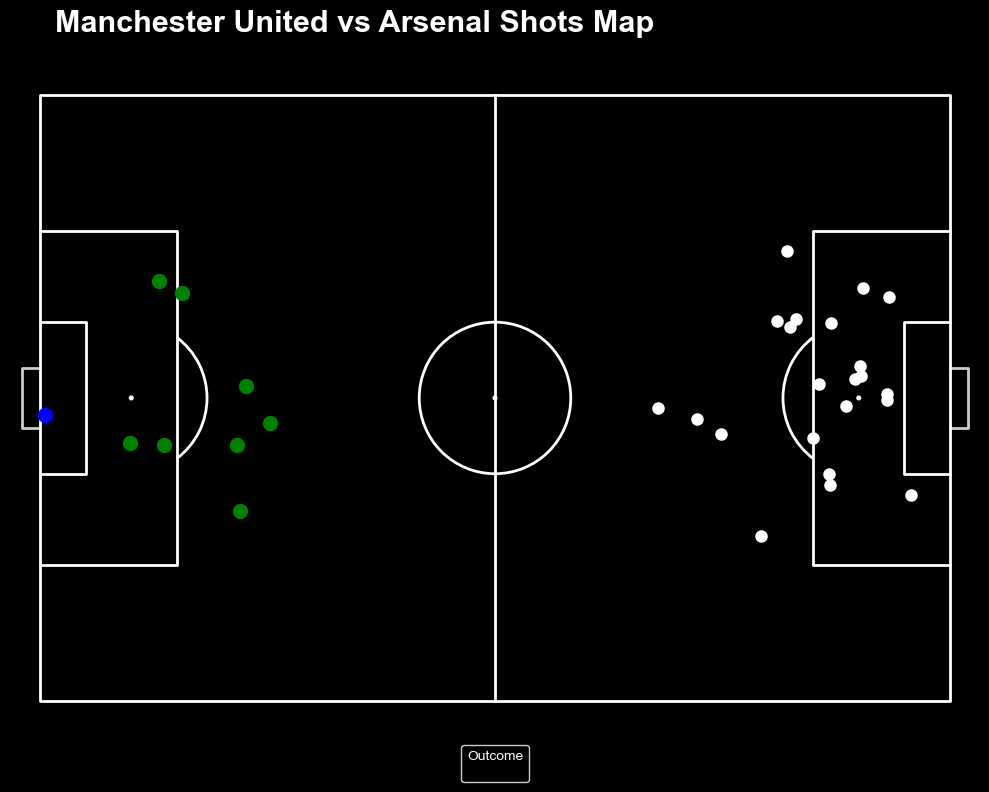

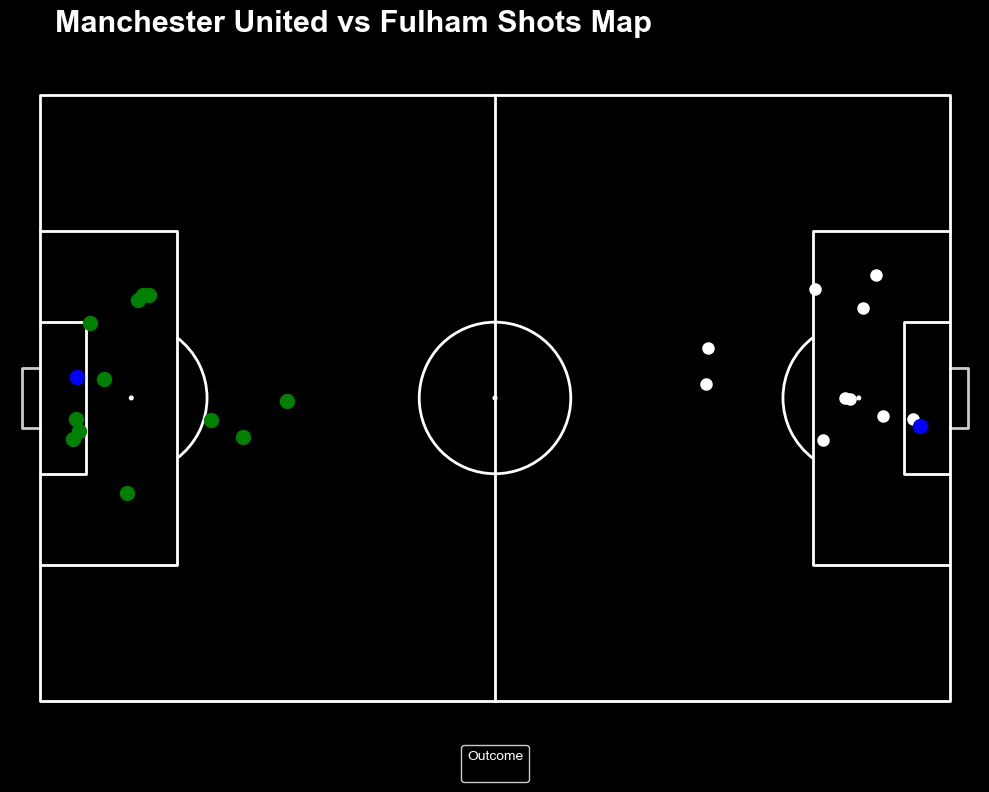

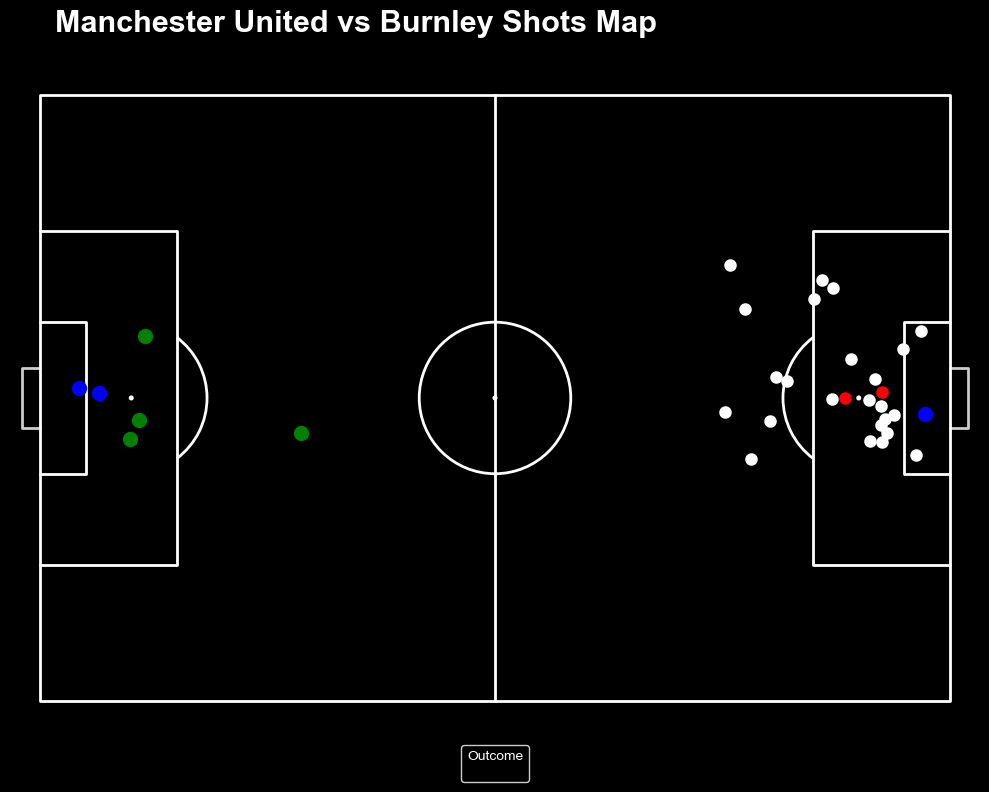

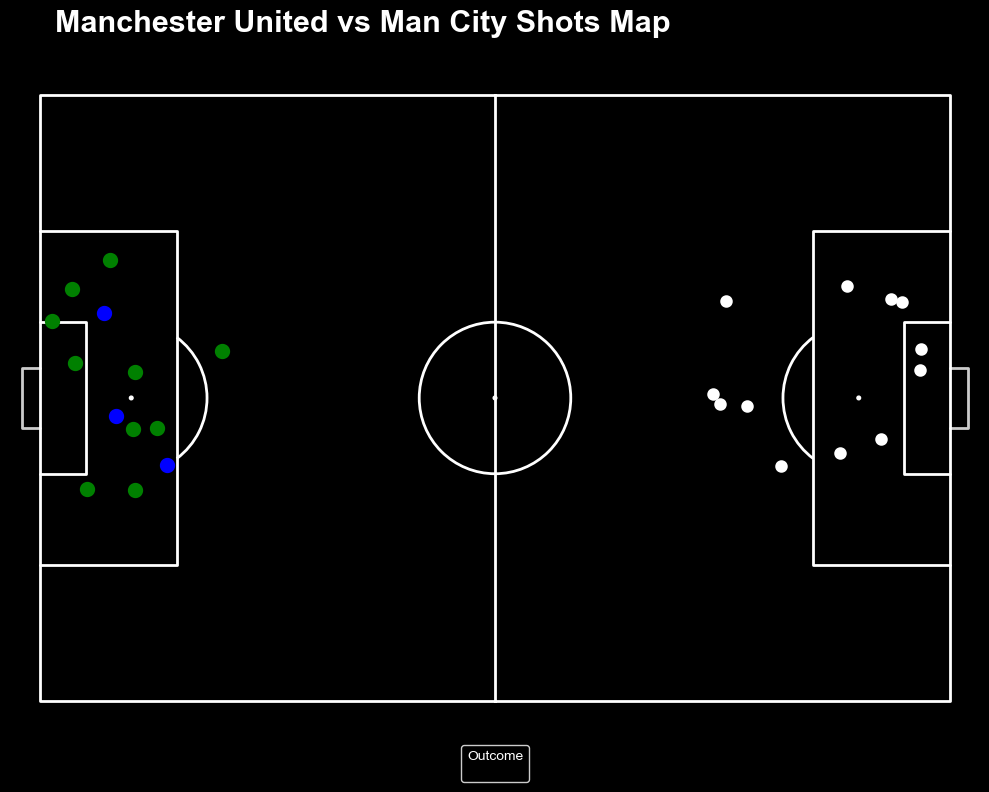

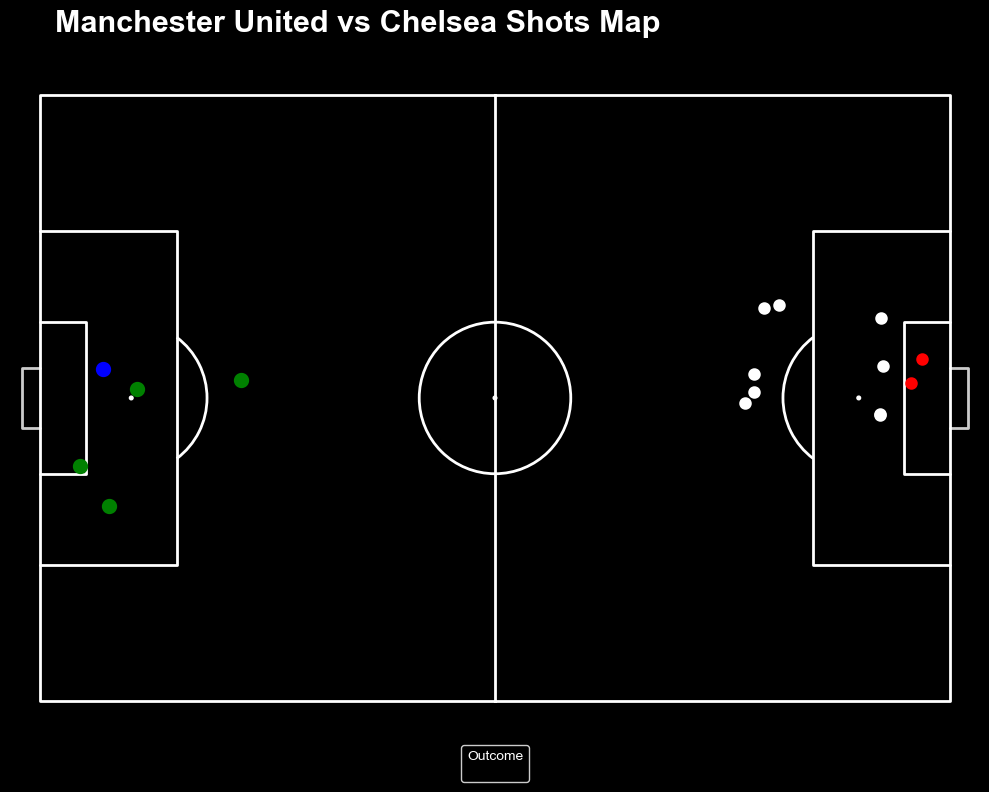

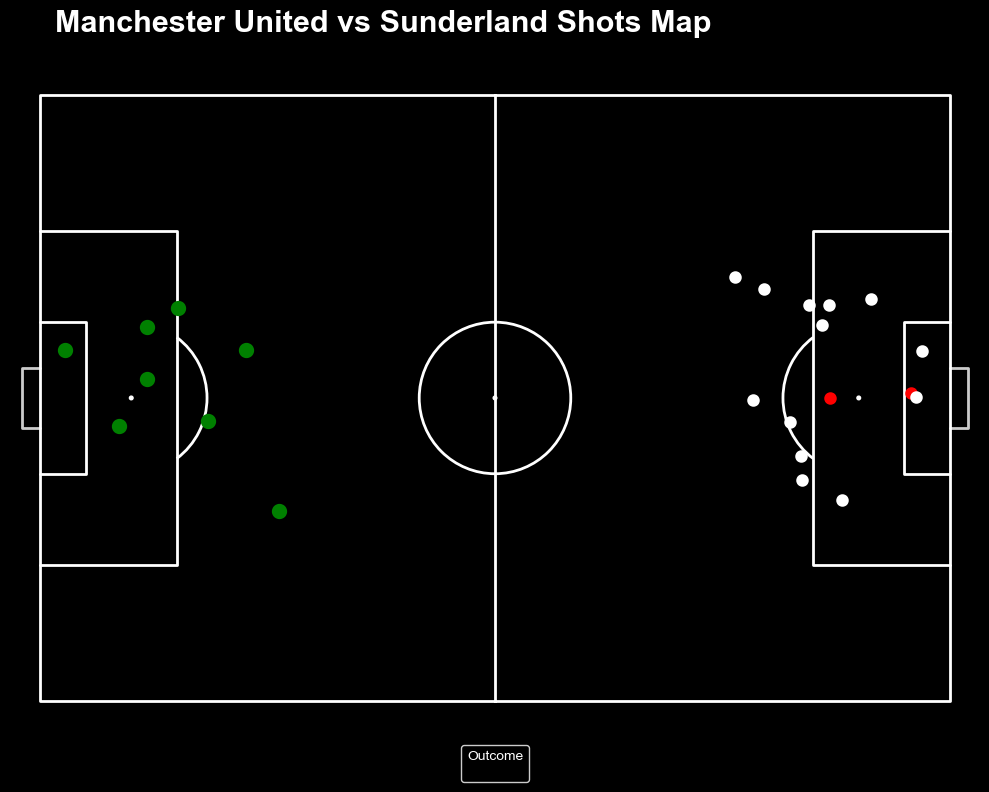

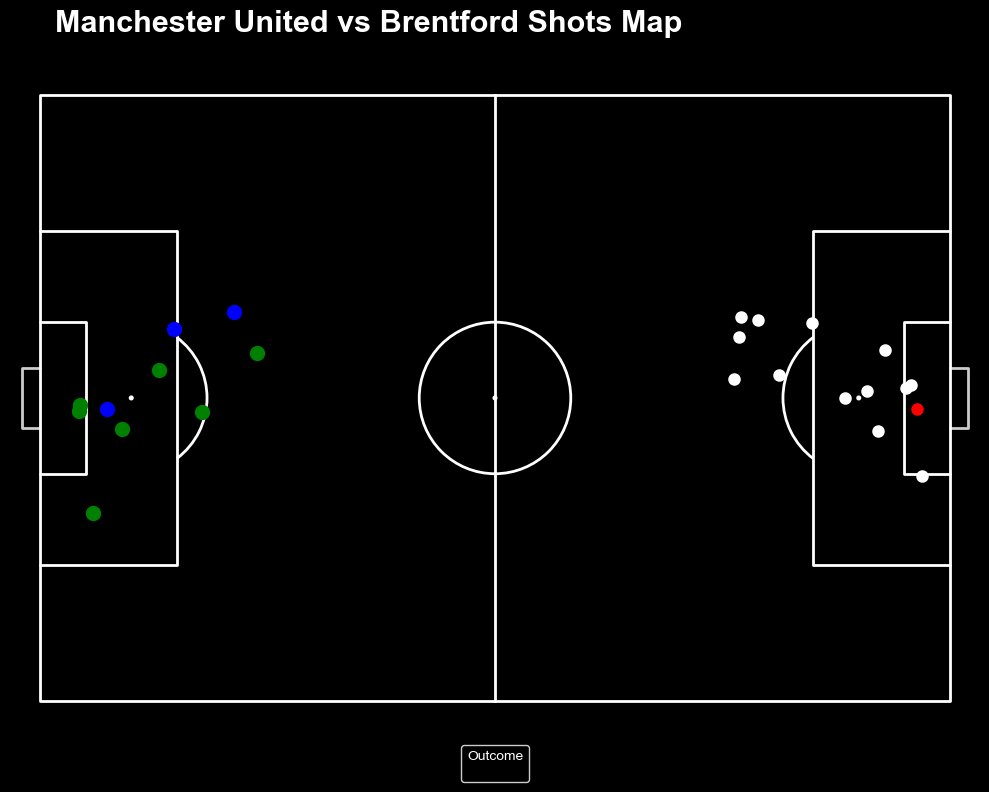

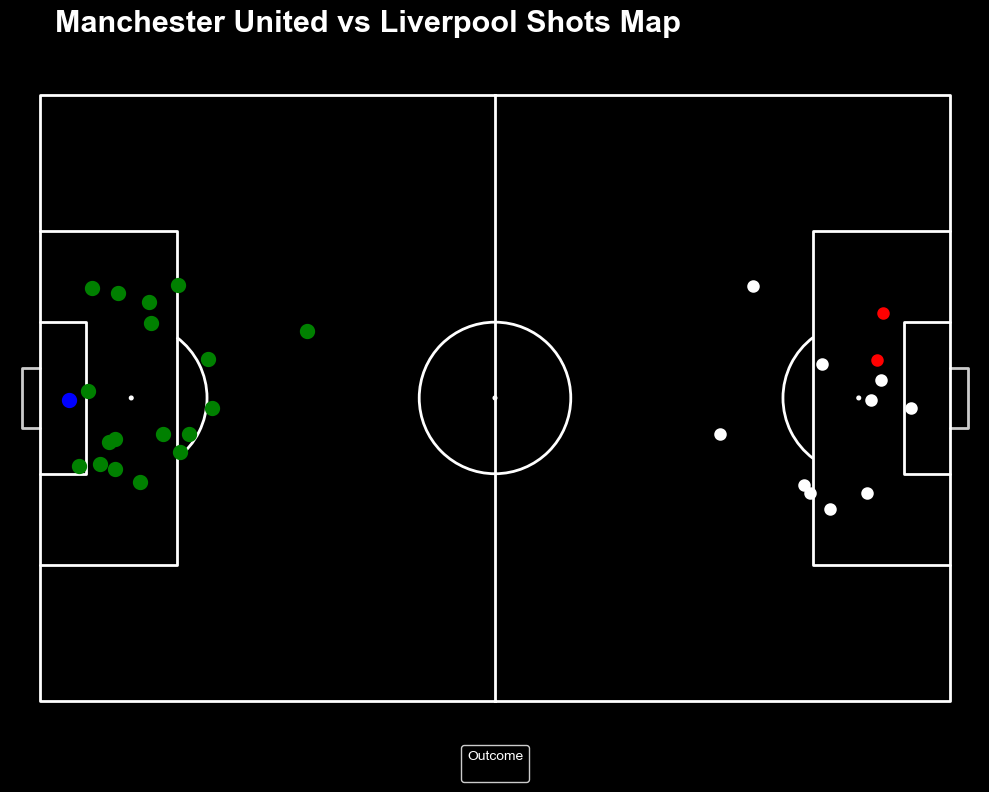

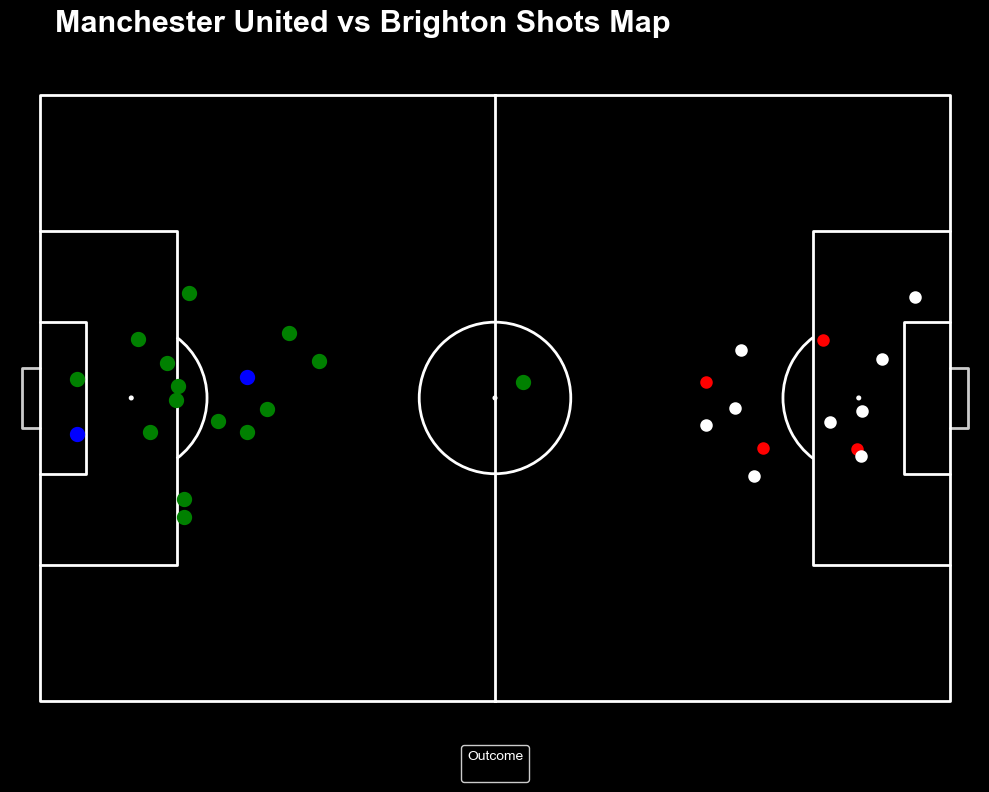

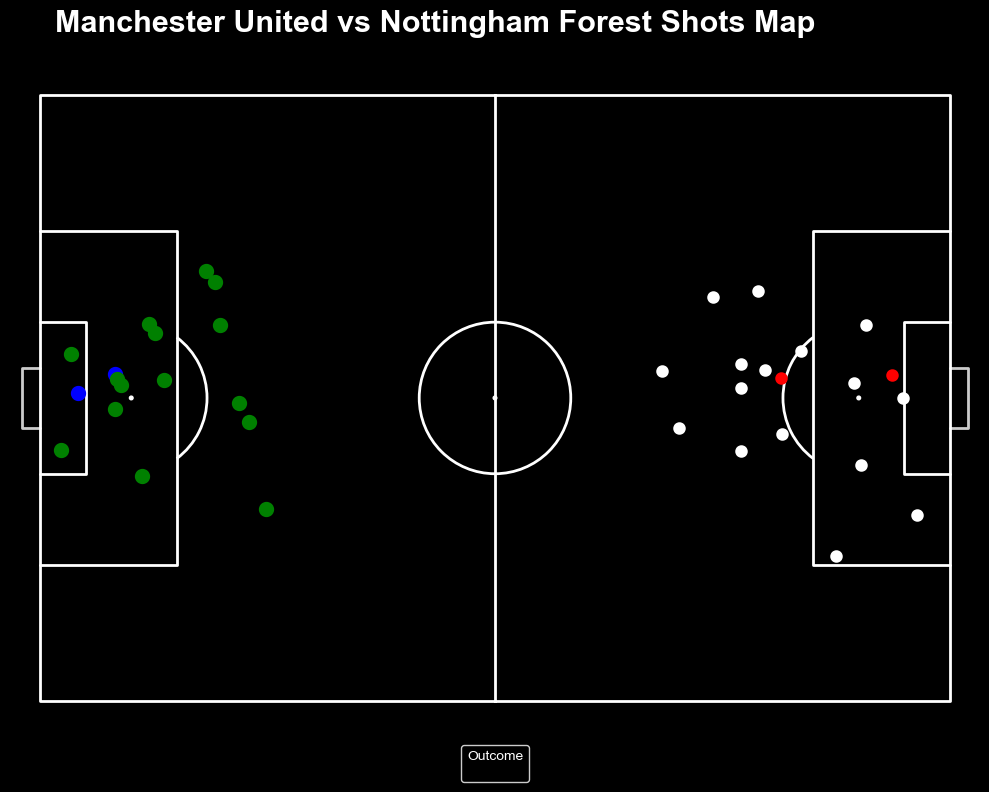

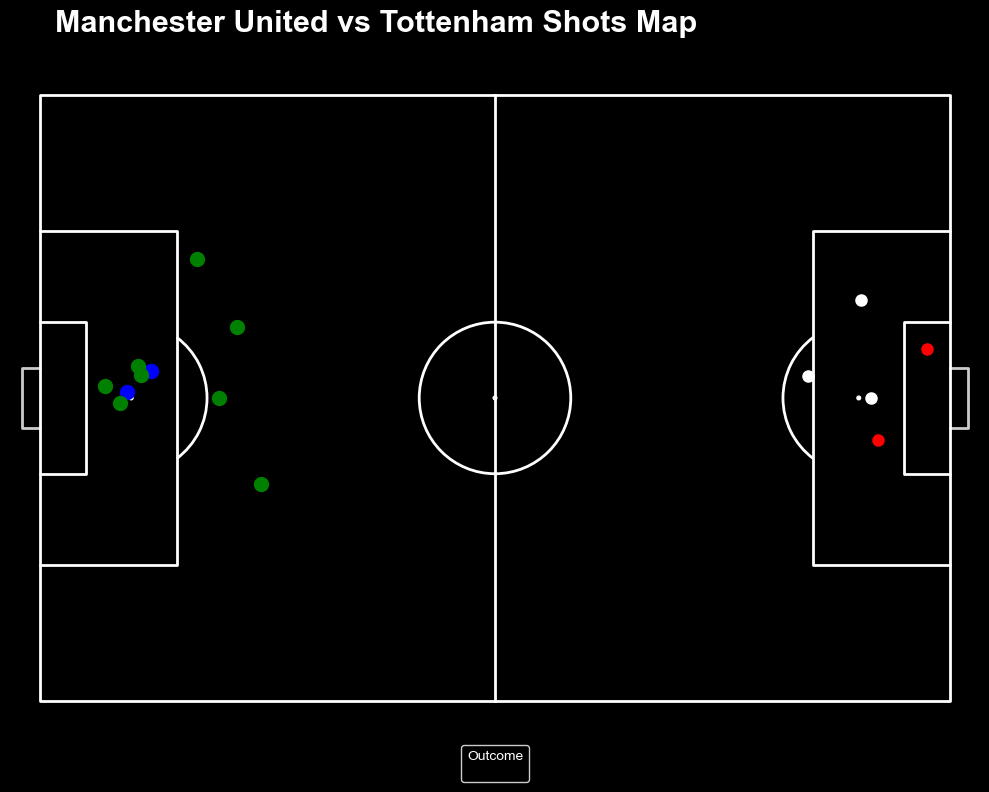

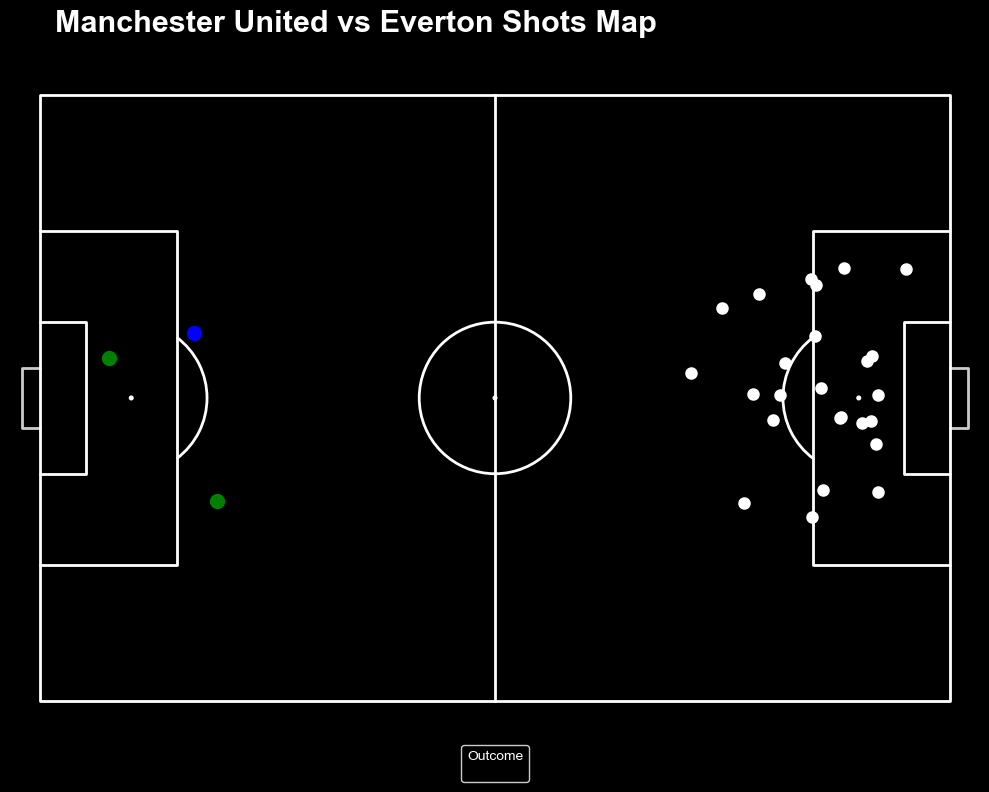

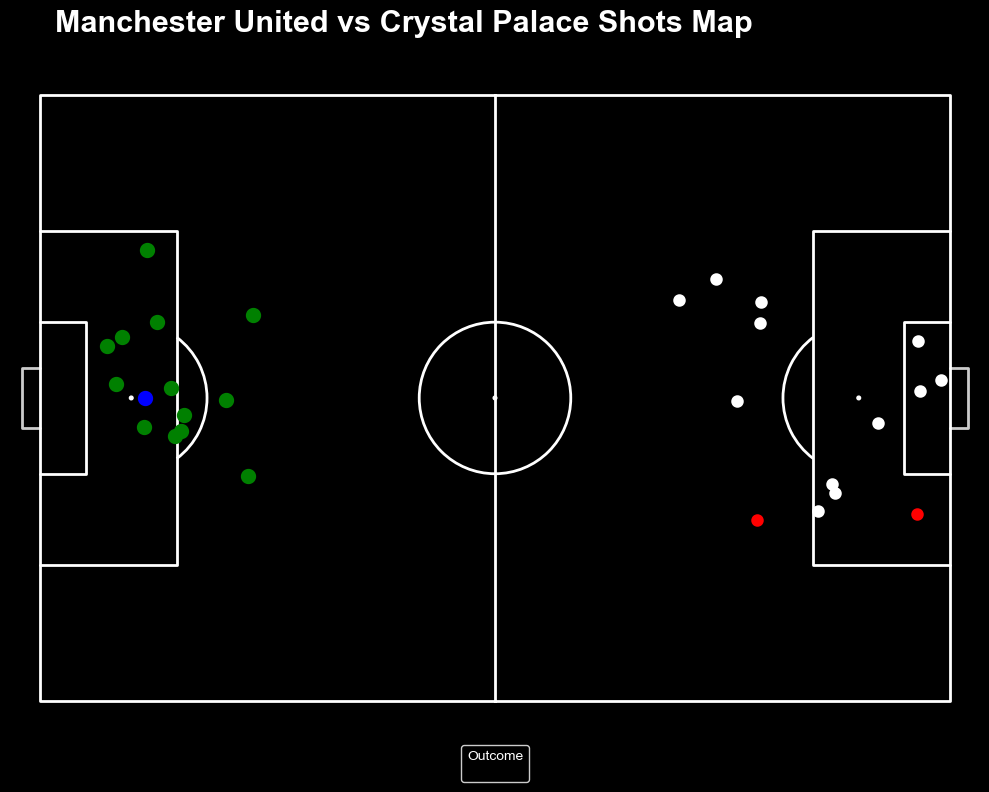

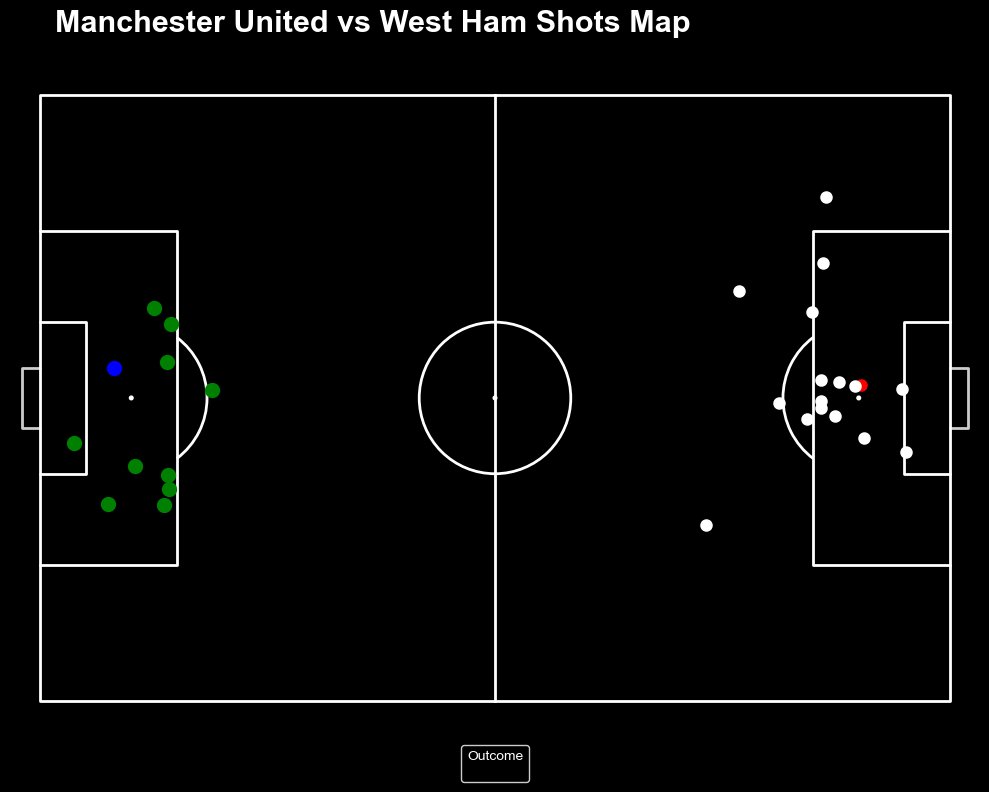

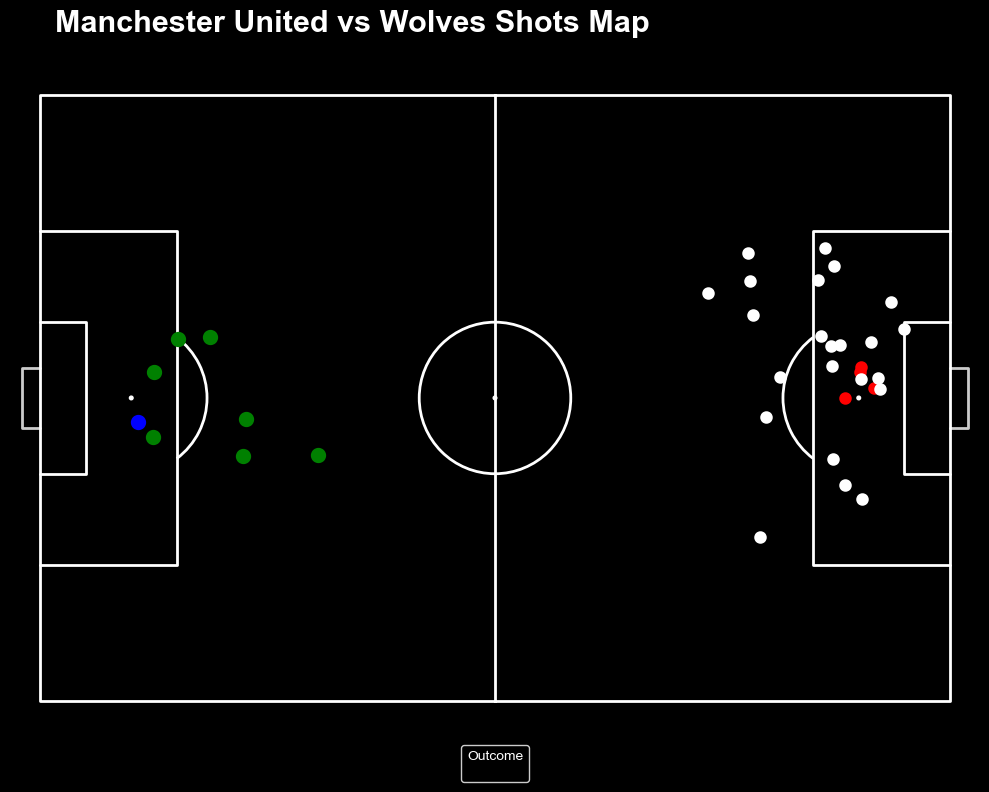

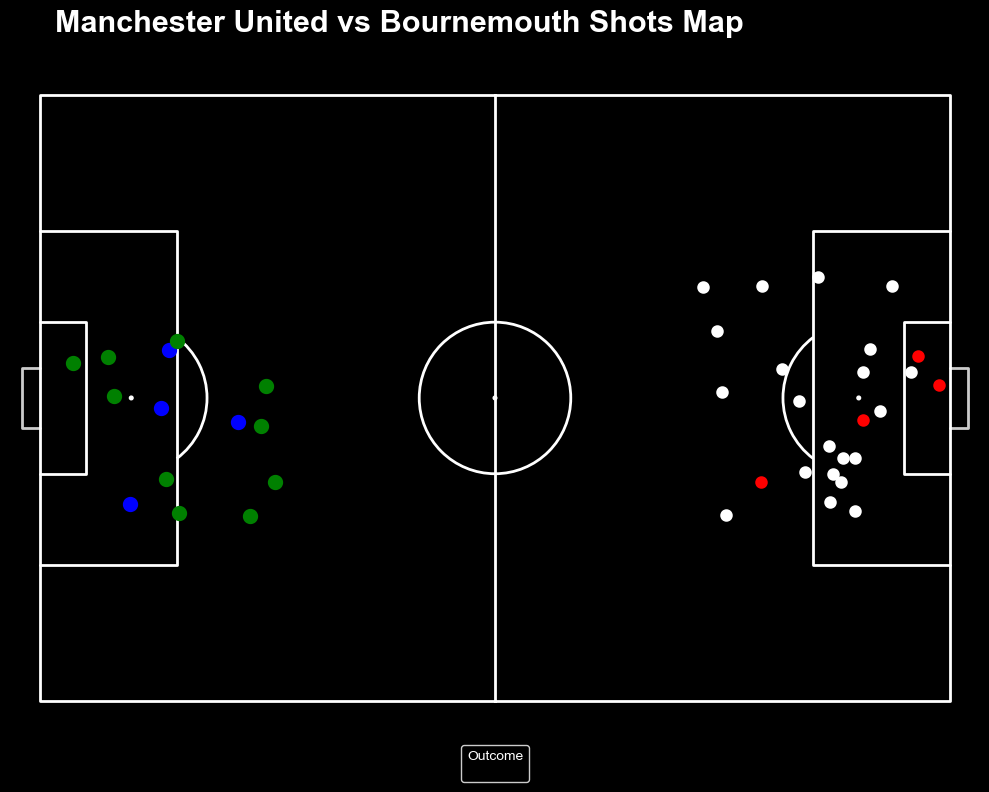

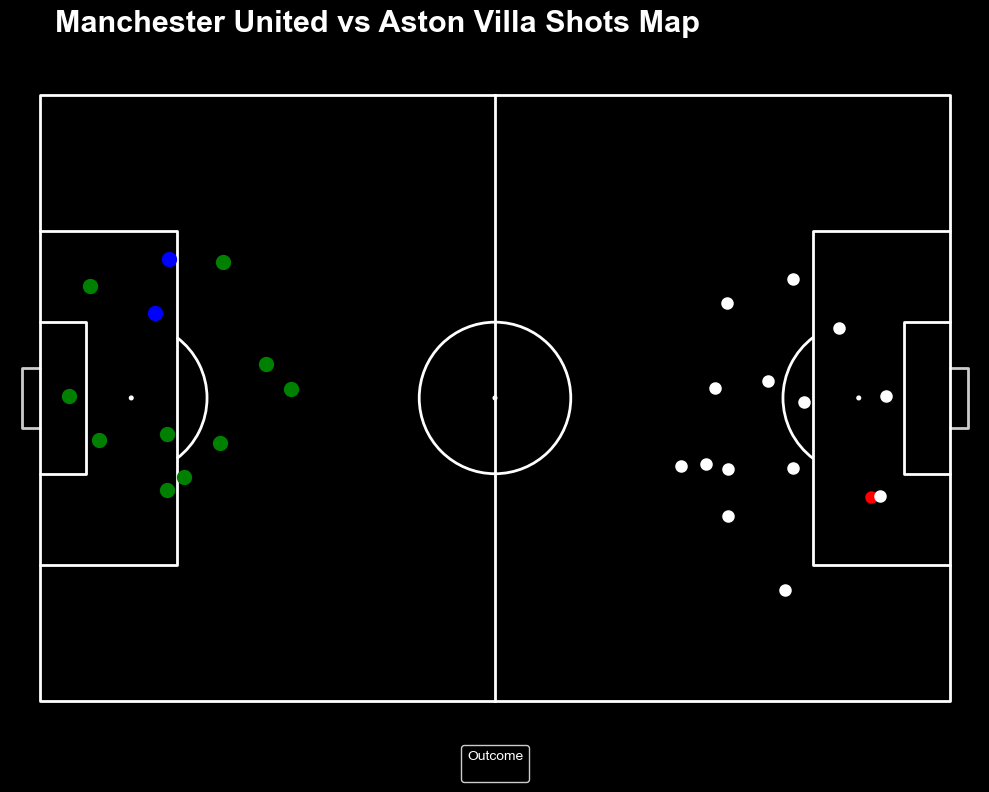

In [179]:
for i in range(len(games)):
    shotmap_gen(games[i])
    i+=1